In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [25]:


writing = pd.read_csv('letter-recognition.data')

x = writing.drop('T', axis = 1)
y = writing['T']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

 


In [27]:
mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', 
                    solver='sgd', alpha=0.01, batch_size=32, 
                    learning_rate_init=0.1, max_iter=500) 
 
mlp.fit(x_train, y_train)  
print(mlp.score(x_test, y_test))

0.63075


C:\Users\haeun\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


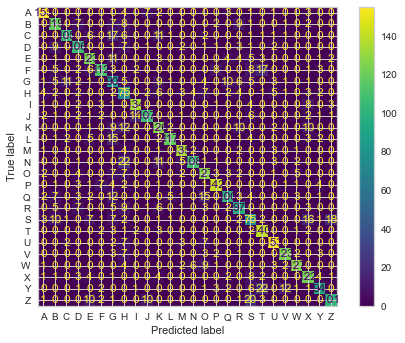

In [38]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mlp, x_test, y_test)
plt.show()

C:\Users\haeun\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


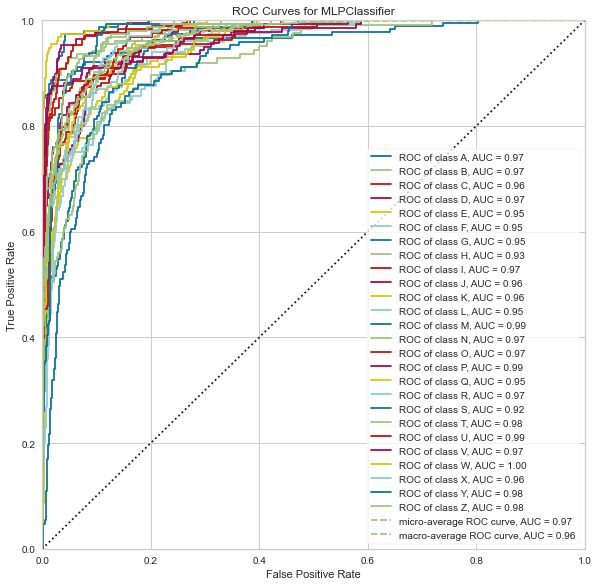

<AxesSubplot:title={'center':'ROC Curves for MLPClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [28]:
class_list=np.unique(y)
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(mlp, classes=class_list,size=(700,700))
visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()

In [14]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           A       0.86      0.88      0.87       155
           B       0.66      0.78      0.71       156
           C       0.80      0.76      0.78       156
           D       0.75      0.82      0.78       158
           E       0.70      0.79      0.74       151
           F       0.88      0.60      0.71       146
           G       0.63      0.43      0.51       159
           H       0.47      0.21      0.29       146
           I       0.91      0.80      0.85       151
           J       0.80      0.82      0.81       157
           K       0.73      0.64      0.68       146
           L       0.93      0.75      0.83       158
           M       0.75      0.92      0.83       158
           N       0.79      0.81      0.80       163
           O       0.63      0.77      0.70       142
           P       0.74      0.87      0.80       164
           Q       0.75      0.67      0.71       162
           R       0.63    

# after normalization

In [34]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)


x_sctrain = scaler.fit_transform(x_train)
x_sctest = scaler.fit_transform(x_test)

In [35]:
 
mlp.fit(x_sctrain, y_train) 
print (mlp.score(x_sctest, y_test))


0.75325


In [17]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           A       0.86      0.88      0.87       155
           B       0.65      0.68      0.66       156
           C       0.87      0.75      0.81       156
           D       0.83      0.73      0.78       158
           E       0.77      0.63      0.69       151
           F       0.81      0.62      0.71       146
           G       0.50      0.64      0.56       159
           H       0.76      0.38      0.51       146
           I       0.89      0.82      0.86       151
           J       0.87      0.79      0.83       157
           K       0.58      0.75      0.65       146
           L       0.81      0.77      0.79       158
           M       0.78      0.86      0.82       158
           N       0.88      0.74      0.81       163
           O       0.69      0.78      0.73       142
           P       0.90      0.85      0.87       164
           Q       0.79      0.71      0.75       162
           R       0.51    

C:\Users\haeun\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 21600x14400 with 0 Axes>

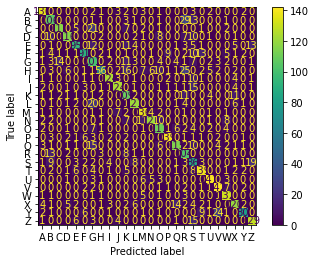

In [22]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(mlp, x_test, y_test)
plt.show()

In [ ]:
from sklearn.metrics import roc_curve,auc



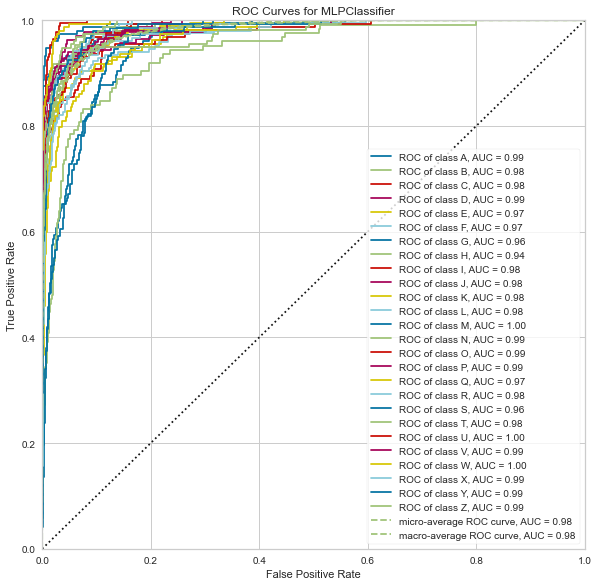

<AxesSubplot:title={'center':'ROC Curves for MLPClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [36]:
class_list=np.unique(y)
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(mlp, classes=class_list, size=(700,700))
visualizer.fit(x_sctrain, y_train)        # Fit the training data to the visualizer
visualizer.score(x_sctest, y_test)        # Evaluate the model on the test data
visualizer.show()